<a href="https://colab.research.google.com/github/jvataidee/DataScience/blob/master/Analise_violencia_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_6ecb6c85550043f090237e5943d2647c~mv2.png/v1/fill/w_417,h_88,al_c,q_85,usm_0.66_1.00_0.01/Ativo%2023-8.webp" height="75px"></p>

**by: [João Ataíde](https://www.joaoataide.com)**
#Análise da violênca no Rio de Janeiro
---
<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_454046a4e84e4621abcf372f956ff7f5~mv2.jpg" height="400px"></p>

  Ah Rio de Janeiro, que cidade maravilhosa! Seus belíssimos montes que o cercam, a enorme estátua do Cristo Redentor, sem falar nas praias e museus, que se distribuem por toda a cidade. Mas nem tudo são flores, não é mesmo?
  
  Devido a **“n fatores" históricos e delicados, que entrarei em mérito**, a violência da cidade chegou a níveis alarmantes, como vemos em todos os jornais e programas de televisão por ai.

  No entanto, a **Agência Brasil** instituição do governo federal, indica uma redução da criminalidade, como homicídios dolosos que reduziu de [21% no ano de 2019](https://agenciabrasil.ebc.com.br/geral/noticia/2019-10/rio-teve-21-menos-homicidios-dolosos-de-janeiro-setembro-de-2019). A Instituição utiliza-se de dados divulgados pelo Estado do Rio de janeiro, mais especificamente pelo **Instituto de Segurança Pública (ISP)**, este órgão é responsável por registar ocorrências das delegacias da Polícia Civil.

Então decidi explorar os bancos de dados do [Instituto](http://www.ispdados.rj.gov.br/estatistica.html), mesmo sabendo que estas situações não são **Preto e Branco**, fiz uma análise exploratória de algumas das variáveis, desta forma conseguir retirar alguns *insights*, como irá ver.


## Obtenção dos Dados

Os dados aqui utilizados foram retirados do **Instituto de Segurança Pública do Estado do Rio de Janeiro**, este apresenta 61 variáveis e 6992 casos registados, estes **extraídos no dia 11 de junho de 2020**, mostrando os crimes registados, as cidades que ocorreram em uma *serie temporal deste 2014*.

Porém, para o este presente trabalho, tive que fazer alguns filtros, retirando os dados de 2020, assim como padronizando somente para a cidade do Rio de Janeiro.

In [ ]:
#Importar biblioteca necerrária
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#configurações de gráficos
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Importando os dados

In [ ]:
#Importar os dados
df = "http://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv"
data = pd.read_csv(df, sep =";",encoding='latin-1')

In [ ]:
data.shape

(6992, 61)

In [ ]:
#Mostrar cinco primeiros dados
data.head()

,fmun_cod,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,3300100,Angra dos Reis,2014,1,2014m1,Interior,11,0,0,1,12,2,96,7,4,37,4,0,8,0,5,1,0,0,1,0,0,0,5,23,18,3,3,11,0,98,134,0,0,0,21,35,18,12,5,9,28,6,8,0,98,13,3,0,0,0,11,7,8,0,561,3
1,3300159,Aperibé,2014,1,2014m1,Interior,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,3300209,Araruama,2014,1,2014m1,Interior,2,0,0,0,2,6,69,7,1,45,3,2,9,0,6,0,0,0,1,0,0,0,2,23,16,2,1,10,0,76,105,0,2,0,18,13,9,4,1,4,34,5,5,0,91,10,1,0,0,0,2,7,9,0,480,3
3,3300225,Areal,2014,1,2014m1,Interior,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,3300233,Armação dos Búzios,2014,1,2014m1,Interior,2,0,0,0,2,0,44,6,0,26,0,0,2,0,5,0,0,0,1,0,0,0,20,12,9,9,2,7,0,74,117,0,0,0,4,16,6,10,2,2,26,8,3,2,46,0,0,0,0,0,2,6,2,0,309,3


####Filtrando a Cidade do Rio de Janeiro

Primeiro fiz uma indexagem para a coluna do código de cada município do Estado.

In [ ]:
#Indexar com o fmun_cod
data.set_index("fmun_cod", inplace=True)

In [ ]:
#Localizar ID do Rio de Janeiro
data_rj = data.loc[3304557]

In [ ]:
data_rj.head()

,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
fmun_cod,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3304557,Rio de Janeiro,2014,1,2014m1,Capital,113,3,5,32,153,192,3562,194,62,1909,354,54,1336,286,3273,423,5,0,308,6,80,0,1027,6859,629,2357,672,1059,0,4743,9753,0,94,21,1672,1019,602,310,110,1011,1132,510,824,32,3469,254,21,0,0,0,121,4004,1336,286,36489,3
3304557,Rio de Janeiro,2014,2,2014m2,Capital,133,2,6,21,162,179,3225,171,46,1808,343,50,1235,244,3200,358,4,3,303,10,80,0,872,6539,661,2370,718,936,0,4466,9314,0,81,15,1648,743,347,292,109,884,1099,421,580,36,2978,209,16,1,0,0,141,3861,1235,244,33328,3
3304557,Rio de Janeiro,2014,3,2014m3,Capital,111,2,4,21,138,156,3282,141,55,1810,404,51,1225,228,3634,335,2,2,354,10,59,0,1069,7017,716,3550,739,1125,0,4559,11045,0,79,10,1626,766,343,310,130,1083,1143,423,871,42,3068,230,18,1,0,0,117,4323,1225,228,36326,3
3304557,Rio de Janeiro,2014,4,2014m4,Capital,94,0,6,18,118,186,3007,138,54,1686,385,47,1207,196,3318,394,2,2,350,5,88,0,834,6796,666,1758,699,732,0,4219,8106,0,60,7,1564,705,294,284,140,1079,1126,369,911,46,2797,227,12,1,0,0,100,4062,1207,196,32219,3
3304557,Rio de Janeiro,2014,5,2014m5,Capital,113,2,2,28,145,159,2553,126,38,1917,368,50,1244,279,3330,305,0,1,346,5,64,0,728,6677,632,1650,645,720,0,4114,7804,0,68,9,1697,758,329,302,136,1090,1012,331,1080,39,2534,164,17,2,0,0,117,3981,1244,279,31448,3


## Iniciando as manipulações

Primeiro vamos entender um pouco sobre o *dataset*, fazendo perguntas como **Quantos dados temos?**, **Quais os tipos de variáveis?**, **Quantos valores ausentes o dataset possui?**



In [ ]:
#Tamanho do dataset
data_rj.shape

(76, 61)

Vemos então que sobraram, 76 dados, com 61 variáveis para a gente analisar

In [ ]:
#Mostrar os tipo dos dados
data_rj.dtypes

fmun                     object
ano                       int64
mes                       int64
mes_ano                  object
regiao                   object
                          ...  
indicador_roubo_rua       int64
indicador_roubo_veic      int64
indicador_roubo_carga     int64
registro_ocorrencias      int64
fase                      int64
Length: 61, dtype: object

Reparei que os dados de data, não em estão em *date time*, portanto irei fazer a conversão. Além disto deletei as colunas 'mes_ano', 'mes', 'regiao' e 'fmun' pois estas não trazem informações pertinentes para este momento, e excluir todos do ano de 2020, pois este ainda esta ocorrendo no presente momento.


In [ ]:
#fazer copia
data_clear = data_rj.copy()

In [ ]:
#Excluir variáveis 
dropar = ["mes_ano","mes","regiao", "fmun"]
data_clear = data_clear.drop(dropar, axis = 1);

In [ ]:
#excluir dados de 2020
filtro = data_clear.ano < 2020
data_clear = data_clear[filtro]

In [ ]:
#Copiar o dataset clear
data_time = data_clear.copy()

In [ ]:
#Indexar pelo ano
data_time.set_index("ano", inplace =True)

In [ ]:
#Agrupar pelo ano
data_time = data_time.groupby(['ano']).sum()

In [ ]:
#Mostrar os cinco primeiros dados
data_time

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
ano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014,1237,17,51,247,1552,2265,34853,1781,573,21791,3668,487,13725,3436,39686,4412,23,23,4745,57,818,0,11363,79204,7515,24662,8207,10232,0,50637,104492,0,855,106,20151,9839,4813,3622,1522,10941,12591,4586,10039,457,32621,2566,180,12,0,0,1305,48843,13725,3436,395717,36
2015,1200,11,44,307,1562,2466,30341,1610,495,19114,3201,442,15478,4195,37014,4471,19,12,7082,58,723,85,10988,81617,7178,21923,7932,12001,529,46338,98052,2,989,89,20287,9593,4716,3828,1154,11166,11090,3397,5667,349,27521,3066,188,19,15,2,1255,48567,15478,4195,376655,36
2016,1330,28,88,463,1909,2223,27245,1499,502,16399,3118,544,19314,4964,45029,7048,14,28,10120,50,448,121,15454,103014,6710,18563,8113,11262,939,48691,97516,9,804,48,21707,7658,3996,2913,836,13811,12747,3810,5050,571,23875,2710,195,11,21,2,1446,62197,19314,4964,389539,36
2017,1492,19,93,527,2131,2225,23758,1565,647,11984,3272,499,25894,5371,45518,8749,14,45,13650,31,411,90,20748,123126,6839,12665,6230,10464,1104,47866,86334,3,811,62,17305,4226,1440,2228,615,19344,11564,2607,5844,853,19088,2117,122,6,18,1,1604,67917,25894,5371,375212,36
2018,1338,25,66,558,1987,1986,24457,1642,642,12076,3262,413,24798,4018,44903,9143,11,33,14622,48,614,109,20276,121111,7050,13043,6781,10000,847,43630,82490,0,830,66,20073,3878,1204,1998,726,18705,10749,2072,5601,1406,20439,2005,134,7,15,4,1429,68668,24798,4018,375027,36
2019,1134,19,34,726,1913,1635,23907,1726,603,11916,2564,392,18466,3145,40456,9775,12,21,14433,79,642,128,14026,104139,6862,13943,6399,11949,1339,50576,91068,0,886,67,23648,4326,1271,2266,827,12812,11711,2078,8456,2050,20532,2009,125,12,10,0,1187,64664,18466,3145,379989,36


Efetuando todas as limpezas, indexei os dados a coluna ano, desta forma temos agora a possibilidade de estudar a fundo os crimes registrado na cidade.



##Qual a média de roubos de veículos por ano?

Os roubos de veículos é uma prática comum, estatísticas nacionais indicam que um [carro é roubado a cada minuto](https://www.minutoseguros.com.br/blog/no-brasil-carro-e-roubado-minuto/), desta forma irei abordar tal questão.

In [ ]:
#Descrições estatísticas
data_time.roubo_veiculo.describe()

count        6.000000
mean     19612.500000
std       4888.905061
min      13725.000000
25%      16225.000000
50%      18890.000000
75%      23427.000000
max      25894.000000
Name: roubo_veiculo, dtype: float64

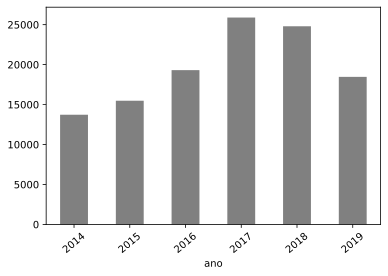

In [ ]:
#Plotar gráficos
data_time.roubo_veiculo.plot(kind ="bar",color  = "grey")
plt.xticks(rotation = 40);

Podemos ver então, que existe uma média de **19612.50** roubos de veículo por ano, além disto, podemos ver que o **máximo** foi de **25894.00** e um mínimo de **13725.00**, o que são valores relativamente bem altos.

##Qual a média de furtos de veículos por ano?

Já o furto, muitas vezes confundido com roubo, é o ato criminoso não violento, possui também prática comum. Dito isto irei, analisar o mesmo.


In [ ]:
#Descrições estatísticas
data_time.furto_veiculos.describe()

count       6.000000
mean     7025.666667
std       291.383367
min      6710.000000
25%      6844.750000
50%      6956.000000
75%      7146.000000
max      7515.000000
Name: furto_veiculos, dtype: float64

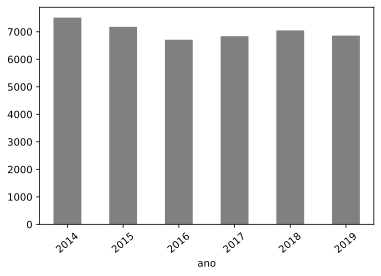

In [ ]:
#Plotar gráficos
data_time.furto_veiculos.plot(kind ="bar",color  = "grey")
plt.xticks(rotation = 40);

O crime de furto, possui valores bem menos do, que o de roubo, apresentando uma espécie de linearidade. Mais além, tais dados possuem ainda uma média de **média de 7025.66** por ano, uma **máxima 7515.00** e **mínima de 6710.00**.

##Quantos veiculos foram recuperados nos anos?

 Desta forma com base nos dados de média de *furto e média de roubo*, irei calcular a porcentagem de veículos que foram recuperados, a qual pode ser calculada com a seguinte equação.

$$
   \frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}
$$



In [ ]:
#Porcentagem de veículos recuperados
rec_vec = (data_time.recuperacao_veiculos)/(data_time.furto_veiculos+data_time.roubo_veiculo)*100

In [ ]:
#Descrições estatísticas
rec_vec.describe()

count     6.000000
mean     53.713210
std       4.214933
min      49.284958
25%      50.816075
50%      52.290771
75%      57.316638
max      59.096325
dtype: float64

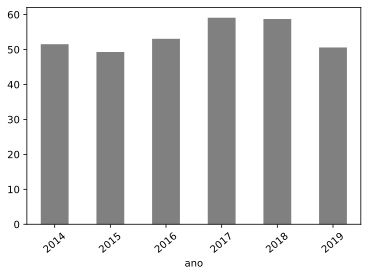

In [ ]:
#Plotar gráficos
rec_vec.plot(kind = "bar",color  = "grey")
plt.xticks(rotation = 40);

In [ ]:
#Média de todos os tempos
(data_time.recuperacao_veiculos.sum()/(data_time.roubo_veiculo.sum() + data_time.furto_veiculos.sum()))*100

54.2949026772363

Para porcentagem de veículos recuperados, notei a ocorrência de valores relativamente parecidos, com uma **média de 53.71%** para cada ano, com um ano que teve um **máximo de 59.09%** e **mínimo de 49.28%**, o qual no presente momento está a entrar no segundo semestre agora. Além disso, a porcentagem de veículos recuperados para todo o intervalo de **6 anos foi de 54,29%**.

##Qual é a distribuição temporal dos latrocinios?

Os crimes de latrocínios (roubo seguido de morte), são dados importantes a se analisar, estes apresentam um índice importante de violência urbana.

In [ ]:
data_time.latrocinio.describe()

count     6.000000
mean     62.666667
std      23.997222
min      34.000000
25%      45.750000
50%      58.500000
75%      82.500000
max      93.000000
Name: latrocinio, dtype: float64

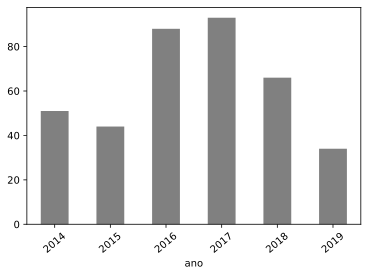

In [ ]:
#Plotar dados de latrocinio
data_time.latrocinio.plot(kind = "bar",color  = "grey")
plt.xticks(rotation = 40)
plt.show();

Desta forma, os casos de latrocínio na cidade do Rio, tiveram o **maior número de casos no ano de 2017**, havendo uma **queda anos de 2018 e 2019.**

##Qual a porcentagem dos crimes de roubos de coletivos?

O roubo de coletivos (ônibus, vans, trens, metrôs e outros), eram práticas comuns do criminoso, alguns anos atrás.

In [ ]:
data_time.roubo_em_coletivo.describe()

count       6.000000
mean     7266.333333
std      2367.376748
min      4412.000000
25%      5115.250000
50%      7898.500000
75%      9044.500000
max      9775.000000
Name: roubo_em_coletivo, dtype: float64

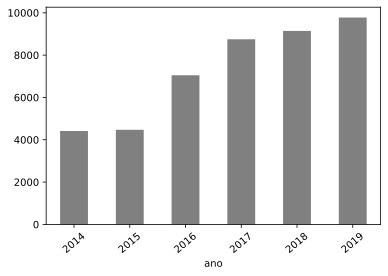

In [ ]:
#Plotar dados de homicídios
data_time.roubo_em_coletivo.plot(kind = "bar",color  = "grey")
plt.xticks(rotation = 40);

No entanto, diferente dos demais dados os roubos de coletivos tiveram o aumento, nos anos de 2016 até 2019.

## Conclusão

Vale salientar que a presente pesquisa trata-se, de um estudo preliminar, no qual mostra a potencialidade do uso de python, estatísticas descritivas básicas e dados, para retirar *insights* e ajudar na tomada de decisão, sendo tal projeto uma prática do curso Data Science da Prática.

Desta forma, foi possível ver que a média dos roubos de veículos diminuíram, já os furtos se mantiveram praticamente em mesma quantidade, e então quando comparamos com o número de veículos recuperados a média total de todos os anos são de 54%. Isto quer dizer que um pouco mais de 50% dos veículos roubados retornam aos seus donos.

Além disto fiz uma análise rápida dos números de latrocínios ocorridos no intervalo de tempo, o que se mostrou uma queda drástica nos anos de 2018 e 2019. Por último, analisei os roubos em coletivos, o qual se mantém em ascensão deste 2016.

